## Machine Learning 

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
####     performance improvement after removing outliers

### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement 6/Analysis'

In [19]:
df = pd.read_csv(os.path.join (path, 'Prepared Data', 'insurance_categories.csv'), index_col=False)

### 2. Data cleaning

In [22]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker',
       'region', 'charges', 'age category', 'bmi category'],
      dtype='object')

In [26]:
# dropping unwanted columns:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [28]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges,age category,bmi category
0,19,female,27.900,0,yes,southwest,16884.92400,young adult,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young adult,obese
2,28,male,33.000,3,no,southeast,4449.46200,young adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,young adult,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,young adult,overweight
5,31,female,25.740,0,no,southeast,3756.62160,young adult,overweight
6,46,female,33.440,1,no,southeast,8240.58960,middle-aged adult,obese
7,37,female,27.740,3,no,northwest,7281.50560,middle-aged adult,overweight
8,37,male,29.830,2,no,northeast,6406.41070,middle-aged adult,overweight
9,60,female,25.840,0,no,northwest,28923.13692,mature adult,overweight


In [30]:
df.shape

(1337, 9)

##### Missing values

In [35]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
age category    0
bmi category    0
dtype: int64

##### Duplicates check

In [38]:
dups = df.duplicated()

In [40]:
dups.shape # No dups

(1337,)

##### Extreme values checks

/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_18707/215799055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], bins=25) # Shows extreme values


<Axes: xlabel='charges', ylabel='Density'>

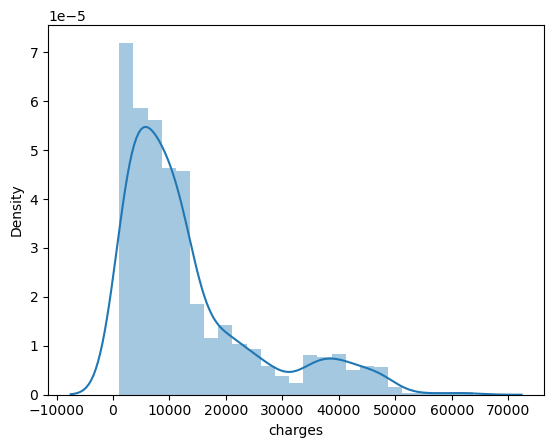

In [42]:
sns.distplot(df['charges'], bins=25) # Shows extreme values

# Some of the outliers may need to be removed.

In [44]:
df['charges'].mean() # Check the mean

13279.121486655948

In [46]:
df['charges'].median() # Check the median

9386.1613

### <mark> mean > median = rightskewed distribution (charges) <mark>

In [48]:
df['charges'].max() # Check the max

63770.42801

### 3. Data prep for regression analysis 

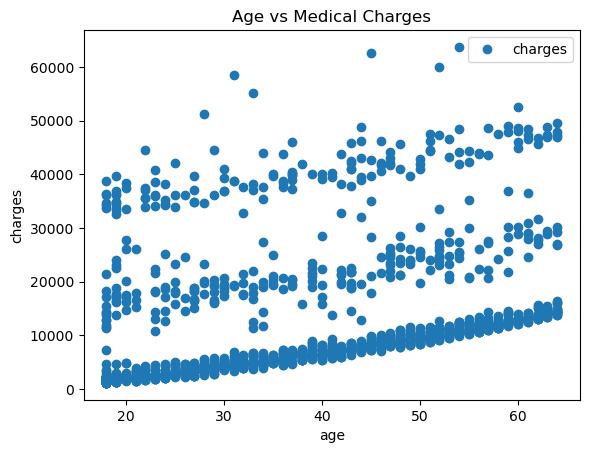

In [53]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'age', y='charges',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Medical Charges')  
plt.xlabel('age')  
plt.ylabel('charges')  
plt.show()

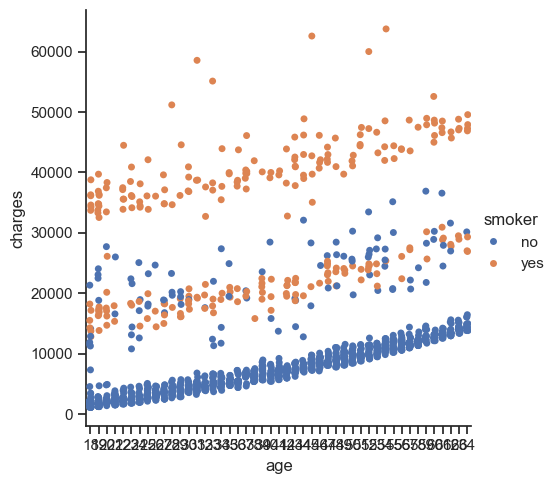

In [63]:
# Age x SMOKE x CHARGES (all ages)

sns.set(style="ticks")
g = sns.catplot(x="age", y="charges", hue="smoker", data=df)
plt.savefig('age_x_charges_X_smoke.png')

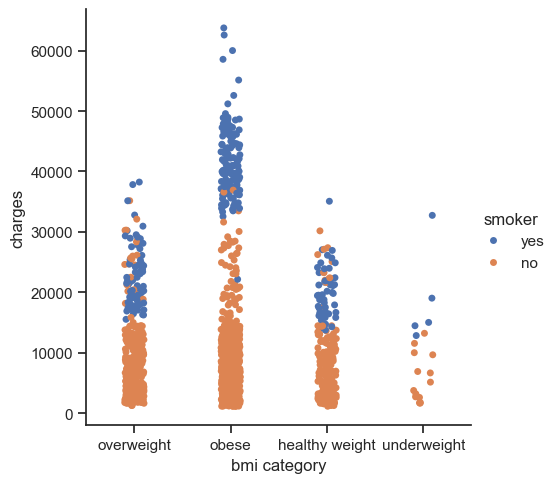

In [65]:
# BMI x SMOKE x CHARGES (all ages)

sns.set(style="ticks")
g = sns.catplot(x="bmi category", y="charges", hue="smoker", data=df)
plt.savefig('bmi_x_charges_X_smoke.png')

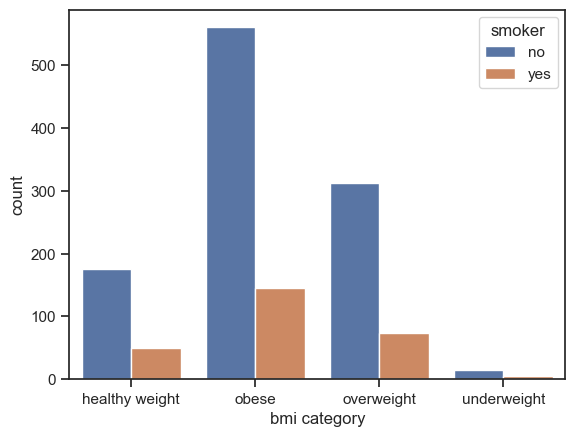

In [69]:
# Stacked bar chart Smoking x BMI - Do obeses smoke more than non-obeses?

sns.barplot(x='bmi category', y='count', hue='smoker', data=df.groupby(['smoker', 'bmi category']).size().reset_index(name='count'))
plt.savefig('bmi-categories_x_smooker-cat.png')

In [83]:
# Group by 'bmi category' and count the number of smokers and non-smokers
grouped_df = df.groupby('bmi category')['smoker'].value_counts().unstack()

In [85]:
# Calculate the percentage of smokers per BMI category
grouped_df['percentage_smokers'] = (grouped_df['yes'] / (grouped_df['yes'] + grouped_df['no'])) * 100


In [87]:
print(grouped_df)

smoker           no  yes  percentage_smokers
bmi category                                
healthy weight  175   50           22.222222
obese           561  145           20.538244
overweight      312   74           19.170984
underweight      15    5           25.000000


In [79]:
df.groupby(['bmi category', 'smoker']).size().unstack()

smoker,no,yes
bmi category,,
healthy weight,175,50
obese,561,145
overweight,312,74
underweight,15,5


### 3.1 Data prep for regression analysis - AGE

### <mark>Hypothesis: "The higher the age, the higher the medical charges"<mark>

In [91]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['age'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [93]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]])

In [95]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [97]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis - AGE

In [100]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [102]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [104]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

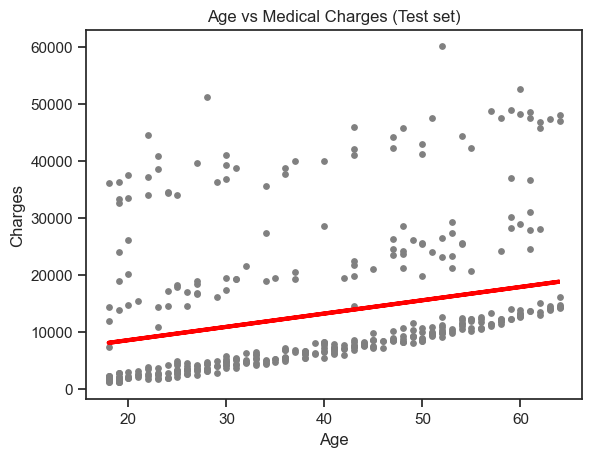

In [106]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Medical Charges (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Charges')
plot_test.show()

### <mark> The majority of the values fall under the model line, whith many points falling much higher too <mark>

### 

In [108]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [110]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  146173303.34737504
R2 score:  0.10739068301367438


### Even though the slope points to a positive relationship, the root mean squared error (MSE) shows that the regression line is innacurate (far from most points)

### The R2 score is very low, at 0.10, indicating a poor fit of this model

In [112]:
y_predicted

array([[ 8086.24297948],
       [14843.9358021 ],
       [15309.98358297],
       [ 8319.26686991],
       [15776.03136384],
       [ 9950.43410296],
       [ 8086.24297948],
       [ 8319.26686991],
       [ 8319.26686991],
       [17407.19859688],
       [15076.95969253],
       [ 9950.43410296],
       [18572.31804906],
       [14144.86413079],
       [12280.67300731],
       [ 9251.36243165],
       [12280.67300731],
       [ 9950.43410296],
       [12746.72078818],
       [18805.34193949],
       [ 8086.24297948],
       [17873.24637775],
       [ 8319.26686991],
       [ 9018.33854122],
       [ 9018.33854122],
       [11348.57744557],
       [10416.48188383],
       [15309.98358297],
       [11115.55355513],
       [ 8552.29076035],
       [13212.76856905],
       [15776.03136384],
       [16941.15081601],
       [16708.12692558],
       [ 9484.38632209],
       [18106.27026819],
       [14610.91191166],
       [10416.48188383],
       [14843.9358021 ],
       [ 8552.29076035],


In [114]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,8086.242979
1,8547.69130,14843.935802
2,9290.13950,15309.983583
3,32548.34050,8319.266870
4,9644.25250,15776.031364
5,2680.94930,9950.434103
6,2198.18985,8086.242979
7,1241.56500,8319.266870
8,2710.82855,8319.266870
9,12235.83920,17407.198597


### <mark> actual and predicted values are clearly distinct<mark>

##### Compare how the regression fits the training set

In [117]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [119]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [121]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  128318059.75747488
R2 score:  0.07682646420531714


In [3]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Medical Charges vs Age (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Medical Charges')
plot_test.show()

NameError: name 'plt' is not defined

### Bonus: performance improvement after isolating smoking status

In [128]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_smokers = df[df['smoker'] == 'yes'] 

In [132]:
df_smokers.head()

,age,sex,bmi,children,smoker,region,charges,age category,bmi category
0,19,female,27.90,0,yes,southwest,16884.9240,young adult,overweight
11,62,female,26.29,0,yes,southeast,27808.7251,mature adult,overweight
14,27,male,42.13,0,yes,southeast,39611.7577,young adult,obese
19,30,male,35.30,0,yes,southwest,36837.4670,young adult,obese
23,34,female,31.92,1,yes,northeast,37701.8768,young adult,obese


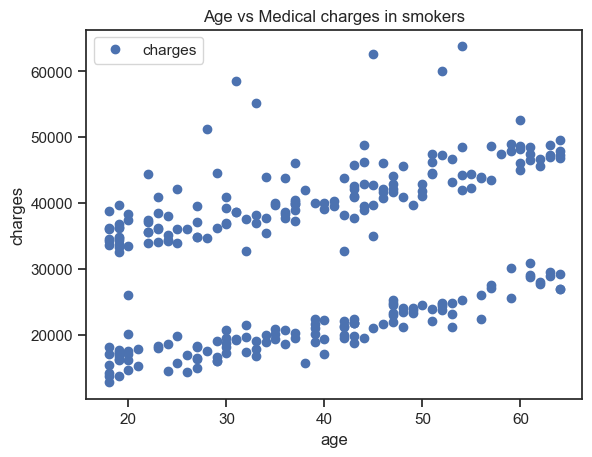

In [134]:
# See how the scatterplot looks without outliers.

df_smokers.plot(x = 'age', y='charges', style='o')  
plt.title('Age vs Medical charges in smokers')  
plt.xlabel('age')  
plt.ylabel('charges')  
plt.show()

### After isolating smoking status, there is still something affecting medical charges - BMI? 

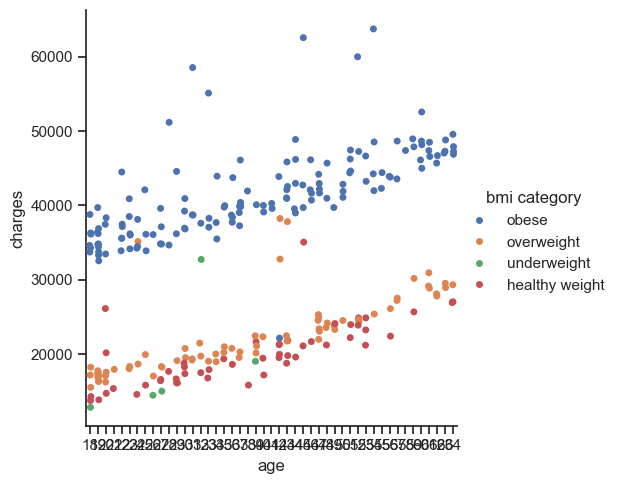

In [138]:
# Age X charges in smokers (x BMI subcategory)

sns.set(style="ticks")
g = sns.catplot(x="age", y="charges", hue="bmi category", data=df_smokers)
plt.savefig('age_x_BMI_X_charges-smokers.png')

### <mark>Obesity affects charges indepentently of smoking status <mark>

### <mark>Conclusion: linear regression is not suitable for this analysis<mark>

In [146]:
# Reshape again.

X_2 = df_smokers['age'].values.reshape(-1,1)
y_2 = df_smokers['charges'].values.reshape(-1,1)

In [148]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [150]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [152]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [154]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [156]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[266.83653435]]
Mean squared error:  108716595.62821753
R2 score:  0.18234672169945187


### <mark> Despite accounting for smoking status, the model's performance remains unsatisfactory, as evidenced by the high mean squared error (MSE) and low R-squared score. <mark>

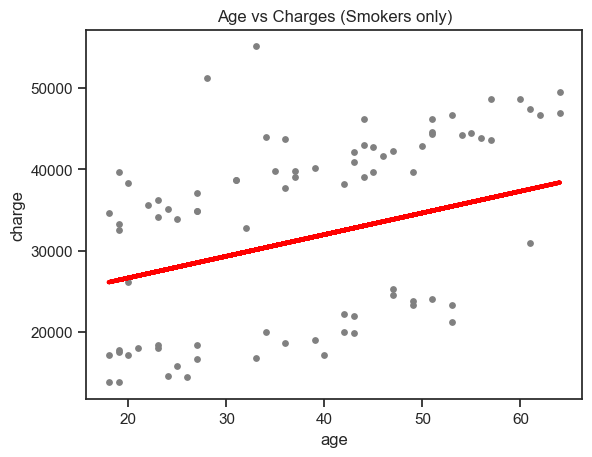

In [160]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Age vs Charges (Smokers only)')
plot_test.xlabel('age')
plot_test.ylabel('charge')
plot_test.show()

In [180]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,44641.19740,34901.423862
1,38344.56600,26629.491298
2,44423.80300,35968.770000
3,23807.24060,34367.750794
4,48673.55880,37302.952671
5,43813.86610,36235.606534
6,14455.64405,28230.510504
7,40941.28540,32766.731587
8,44260.74990,35701.933465
9,35595.58980,27163.164366
